In [105]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [106]:
import warnings
warnings.filterwarnings("ignore") #This is to ignore the warning messages that appears on notebook

In [107]:
# uploading loan file  
# used data dictionary for understanding of column names.

df = pd.read_csv("D:/IIIT-B/loan.csv")

In [108]:
#Renaming column names for better understanding

df.rename(columns={'installment':'monthly_installment','emp_title':'employer_name','emp_length':'employment_duration','annual_inc':'annual_income','issue_d':'issued_date','desc':'description','title':'loan_kind','delinq_2yrs':'delinquency_2','earliest_cr_line':'first_loan','mths_since_last_record':'mths_since_last_public_record','open_acc':'open_Credit_lines','pub_rec':'derogatory_pub_rec','revol_bal':'total_credit_revolve_bal','revol_util':'revol_utilization_rate','out_prncp':'outstanding_principle','total_pymnt':'total_pymnt_received','total_rec_prncp':'total_Principle_received','total_rec_int':'total_interest_received','total_rec_late_fee':'total_latefees_received','recoveries':'gross_recovery','last_pymnt_d':'last_pymnt_date','next_pymnt_d':'next_pymnt_date'},inplace=True)

In [109]:
#checking what kind of data types are available in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [110]:
# Looking at the data we see there are customers who has colsed their lones or customers who defaulted. 

# investors can lose a lot money affecting the business if providing amount to default prone customers.

# hence going through data cleaning, data analysis(univariate,bivariate and multivariate) to provide decent insights. 


#checking the column and row values (shape) of the data
df.shape

(39717, 111)

## Dropping unnecessary columns

In [111]:
# Dropping all columns with all values null

df1 = df.dropna(axis=1,how="all")

### checking which columns can be further deleted

In [112]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [113]:
df.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [114]:
df.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [115]:
df.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [116]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [117]:
df.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

### obeservation :
       acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens has null or 0 values filled.
       Hence dropping off these columns 
    

### Fixung missing value columns 


In [118]:
#Dropping application_type column as it has only value INDIVIDUAL

df1 = df1.drop(['application_type'],axis=1)

In [119]:
# Dropping acc_now_delinq , chargeoff_within_12_mths, delinq_amnt, tax_liens,policy_code column 

df1 = df1.drop(["acc_now_delinq"],axis=1)

df1 = df1.drop(["chargeoff_within_12_mths"],axis=1)

df1 = df1.drop(["delinq_amnt"],axis=1)

df1 = df1.drop(["tax_liens"],axis=1)

In [120]:
# Dropping delinquency_2 column 

df1 = df1.drop(["delinquency_2"],axis=1)

In [121]:
# Dropping inq_last_6mths column 

df1 = df1.drop(["inq_last_6mths"],axis=1)

In [122]:
# deleting policy code column as no significant impact on analysis as single value only
df1 = df1.drop(["policy_code"],axis=1)


In [123]:
# deleting pymnt_plan column as no significant impact on analysis as single value only

df1 = df1.drop(["pymnt_plan"],axis=1)

In [124]:
# deleting employer_name column as no significant impact on analysis as single value only
df1 = df1.drop(["employer_name"],axis=1)

In [125]:
# deleting initial_list_status column as no significant impact on analysis as single value only
df1 = df1.drop(["initial_list_status"],axis=1)


### checking which columns has further null values 

In [126]:
df1.employment_duration.isnull().sum()

1075

In [127]:
df1.loan_kind.isnull().sum()

11

In [128]:
df1.description.isnull().sum()

12940

### Observation:
    employer_name,employment_duration,loan_kind,employer_name has still null values however its less than 30% hence not imputing data,neither deleting column as off now

### Standardising Values

In [129]:
# changed df.term from string(' 36 months') to int 36

df1.term = df1.term.apply(lambda a : int(a[1:-7]))

In [130]:
# changed df.int_rate from string(' 10.65%') to float 10.65

df1.int_rate = df1.int_rate.apply(lambda a : float(a[:-1]))

In [131]:
# removed "%" from all values of "revol_utilization_rate" column and changed to float with new column revol_utilization_rate_2

def convert_to_float(x):
  if x:
    y = str(x).split('%')[0]
    return float(y)
  else:
    pass
df1['revol_utilization_rate_2'] = df1['revol_utilization_rate'].apply(convert_to_float)
df1['revol_utilization_rate_2'].dtypes


dtype('float64')

### Dropping customer behavioral data not present at loan approval

In [132]:
# the customer behavioral data was not present at the time of loan application,
# thus they cant be used as a predictors for loan approval.
# hence deleting mentioned columns :- "mths_since_last_delinq","total_acc","total_credit_revolve_bal","outstanding_principle","out_prncp_inv","total_pymnt_received","total_pymnt_inv","total_Principle_received ","total_interest_received","total_latefees_received","gross_recovery","collection_recovery_fee","last_pymnt_date","last_pymnt_amnt","next_pymnt_date","last_credit_pull_d"

cust_beh = ["mths_since_last_delinq","total_acc","total_credit_revolve_bal","outstanding_principle","out_prncp_inv","total_pymnt_received","total_pymnt_inv","total_Principle_received","total_interest_received","total_latefees_received","gross_recovery","collection_recovery_fee","last_pymnt_date","last_pymnt_amnt","next_pymnt_date","last_credit_pull_d"]

for i in cust_beh:
    df1 = df1.drop([i],axis=1)


In [133]:
df1.shape

(39717, 31)

## Sanity Check

In [134]:
# 1. funded amont by ivestors should not be more than loan amount requested: 

df1[df1.loan_amnt < df1.funded_amnt_inv]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,monthly_installment,grade,sub_grade,...,addr_state,dti,first_loan,mths_since_last_public_record,open_Credit_lines,derogatory_pub_rec,revol_utilization_rate,collections_12_mths_ex_med,pub_rec_bankruptcies,revol_utilization_rate_2


In [135]:
# term is no other than 36 months or 60 months

df1[~((df1.term == 36) | (df1.term == 60))]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,monthly_installment,grade,sub_grade,...,addr_state,dti,first_loan,mths_since_last_public_record,open_Credit_lines,derogatory_pub_rec,revol_utilization_rate,collections_12_mths_ex_med,pub_rec_bankruptcies,revol_utilization_rate_2


### Creating Derived Columns

In [136]:
#Creating derived column from issues_date column as the year and month might be required 

df1["issued_year"] = pd.to_datetime(df1.issued_date.str.upper(), format='%b-%y',yearfirst=False).dt.year

df1["issued_month"] = pd.to_datetime(df1.issued_date.str.upper(), format='%b-%y',yearfirst=False).dt.month

In [137]:
#Creating derived column from first_loan column as the year and month might be required 


df1["first_loan_month"] = pd.to_datetime(df1.first_loan.str.upper(), format='%b-%y',yearfirst=False).dt.month
df1["first_loan_year"] = pd.to_datetime(df1.first_loan.str.upper(), format='%b-%y',yearfirst=False).dt.year


In [138]:
#checking unique column values in dataframe 
df1.nunique()

id                               39717
member_id                        39717
loan_amnt                          885
funded_amnt                       1041
funded_amnt_inv                   8205
term                                 2
int_rate                           371
monthly_installment              15383
grade                                7
sub_grade                           35
employment_duration                 11
home_ownership                       5
annual_income                     5318
verification_status                  3
issued_date                         55
loan_status                          3
url                              39717
description                      26527
purpose                             14
loan_kind                        19615
zip_code                           823
addr_state                          50
dti                               2868
first_loan                         526
mths_since_last_public_record      111
open_Credit_lines        

## deleting all row having 'current' in loan_status column

In [139]:
# deleting 'current' data from loan_status column as we only need to analyse  Fully Paid and Charged Off as per business need


df1 = df1[(df1.loan_status == "Fully Paid") | (df1.loan_status == "Charged Off")]

In [140]:
df1.to_csv("checklist2.csv")

In [141]:
df1.employment_duration.value_counts().index

Index(['10+ years', '< 1 year', '2 years', '3 years', '4 years', '5 years',
       '1 year', '6 years', '7 years', '8 years', '9 years'],
      dtype='object')

### creating a derived column emp_dur from "employment_duration" for ordered categorical values from that column 

In [142]:
# creating a derived column emp_dur from "employment_duration" for ordered categorical values from that column 

emp_dur = {'<1 years':1,'1 years':2,'2 years':3,'3 years':4,'4 years':5,'5 years':6,'6 years':7,'7 years':8,'8 years':9,'9 years':10,'10+ years':11}
def employment_dur(x):
    y = None
    for mn,val in emp_dur.items():
        if x == mn:
            y = emp_dur[mn]
        if y:
          return int(y)
        else:
          pass

df1['emp_dur'] = df1['employment_duration'].apply(employment_dur)

In [143]:
df1.dtypes

id                                 int64
member_id                          int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                               int64
int_rate                         float64
monthly_installment              float64
grade                             object
sub_grade                         object
employment_duration               object
home_ownership                    object
annual_income                    float64
verification_status               object
issued_date                       object
loan_status                       object
url                               object
description                       object
purpose                           object
loan_kind                         object
zip_code                          object
addr_state                        object
dti                              float64
first_loan                        object
mths_since_last_

### creating two lists with loan characteristics: loan_char and demographic values : demographic  

In [144]:
loan_char = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate','verification_status','loan_status','purpose','loan_kind', 'zip_code','addr_state'
             ,'dti','mths_since_last_public_record','open_Credit_lines','derogatory_pub_rec','revol_utilization_rate','pub_rec_bankruptcies','emp_dur']

demographic = ['employment_duration', 'home_ownership', 'annual_income']

### creating different list for continuius variables and categorical variables 

#### (cont for continous and cat_col for categorical columns)

In [145]:
cont = ["loan_amnt","funded_amnt_inv","int_rate","monthly_installment","annual_income","funded_amnt","revol_utilization_rate","dti","annual_income","monthly_installment","int_rate"]

cat_col = ["employment_duration","home_ownership","term","verification_status","loan_status","description","issued_year","grade","emp_dur","purpose","addr_state","zip_code"]

In [146]:
# Saving a copy

df1.to_csv("checklist.csv")

# Binning 

### binning cont variable int_rate into 5 categorical values "VL_int","L_int","M_int","H_int","VH_int" ###

#####      and created a new column  int_rate_Bucket

In [147]:
df1['int_rate_Bucket'] = pd.qcut(df1.int_rate, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL_int","L_int","M_int","H_int","VH_int"])

### binning cont variable annual_income into 10 categorical values  ###     
##### VL_income_1","VL_income_2","L_income_1","L_income_2","M_income_1","M_income_2","H_income_1","H_income_2","VH_income_1","VH_income_2", and created new column annual_income_bucket


In [148]:
df1['annual_income_bucket'] = pd.qcut(df1.annual_income, [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                               ["VL_income_1","VL_income_2","L_income_1","L_income_2","M_income_1","M_income_2","H_income_1","H_income_2","VH_income_1","VH_income_2"])

### binning cont variable funded_amnt_inv_bucket into 10 categorical values ###

##### "VL_funded","L_funded","M_funded","H_funded","VH_funded"

In [149]:
df1["funded_amnt_inv_bucket"] = pd.qcut(df1.funded_amnt_inv, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL_funded","L_funded","M_funded","H_funded","VH_funded"])

### binning cont variable dti into 5 categorical values ###
##### V"VL_dti","L_dti","M_dti","H_dti","VH_dti", and created new column dti_bucket

In [150]:

df1["dti_bucket"] = pd.qcut(df1.dti, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL_dti","L_dti","M_dti","H_dti","VH_dti"])

### Distribution of annual income of all applicants

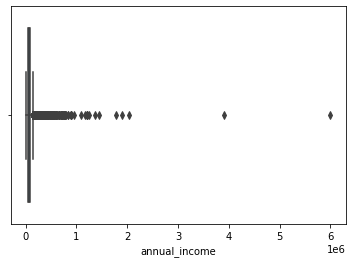

In [151]:
sns.boxplot(df1.annual_income)

plt.show()

In [152]:
df1.annual_income.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_income, dtype: float64

In [153]:
np.percentile(df1.annual_income,50)

58868.0

### checking how loan status  relates to annual income of customers 

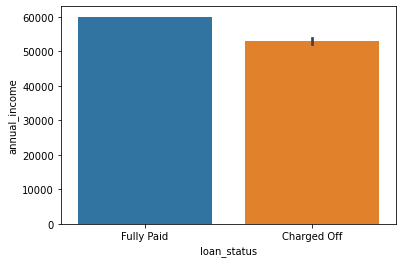

In [154]:
sns.barplot(data=df1,x='loan_status',y='annual_income',estimator=np.median)
plt.show()

#### Insight : there is no big difference between charged off and fully paid customers on basis of annual income. 
#### however it is noticeable that annual income is more towards fully paid customers  

### checking the spread of interest rate for fully paid and charged off customers

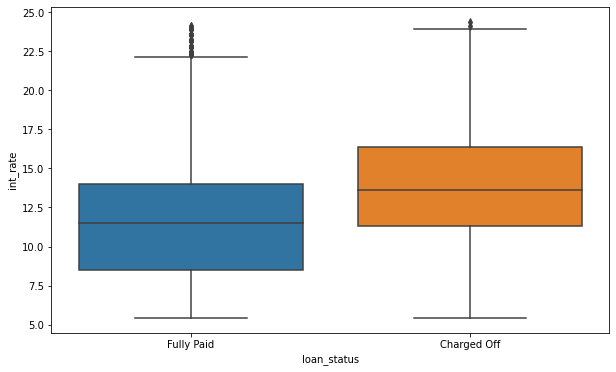

In [155]:
plt.figure(figsize=[10,6])

sns.boxplot(df1['loan_status'],df1['int_rate'])

plt.show()

#### Insight : The spread of charged off customers are towards the high interest rate. 
#### the median off int_rate has a difference of 2.5% interest rate for charged off and fully paid customers

### checking if increase in monthly installments also increase the spread of charged off customers or not

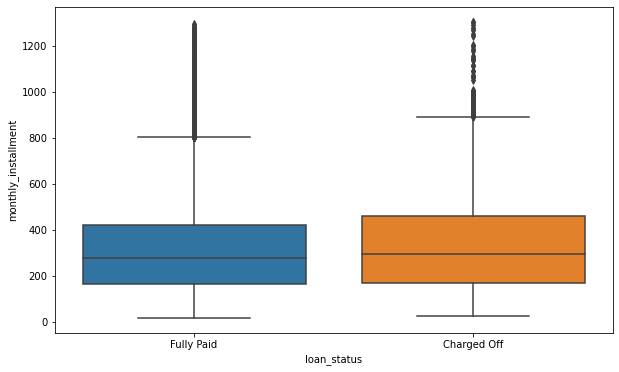

In [156]:
plt.figure(figsize=[10,6])

sns.boxplot(df1['loan_status'],df1['monthly_installment'])

plt.show()

#### Insight : Number of charged of customers also the median of charged off customers are high when 
#### there is a increase in amount of monthly installments however the difference is not huge.

Text(0.5, 1.0, 'Spread of employee duration on charged off customers')

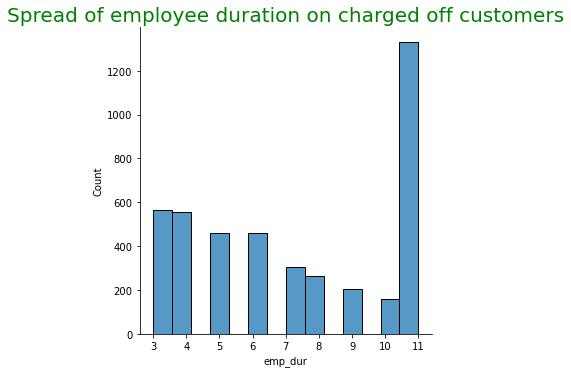

In [157]:
dfc = df1[df1['loan_status'] == "Charged Off"]
dff = df1[df1['loan_status'] == "Fully Paid"]
sns.displot(x = 'emp_dur', data = dfc)
plt.title("Spread of employee duration on charged off customers",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})


#### Insight : The spread of employee duration is more for above 10 years is because there should be big chunk 
#### of employees working for more than 10 yesrs, which includes charged of and fully paid customers.

#### However leaving 10+ year, we see employee duration 3 years to 4 years has a slight more chances of defaulting

#### Checking relation ship between dti and annual income 

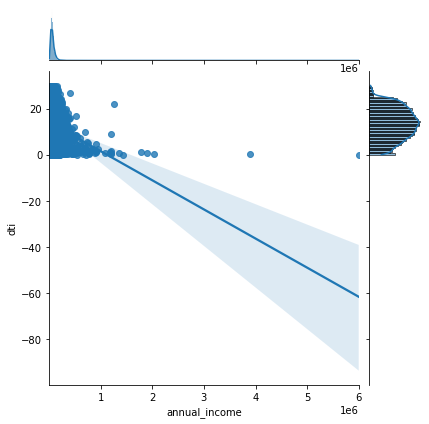

In [158]:
sns.jointplot("annual_income", "dti", data=df1, kind="reg")

plt.show()

##### Insight : dti is going up till a certain point in the monthly income, once the monthly income reaches particular thershold 
##### of monthly income dti starts getting down.

### Recommendation : 
###### provide loan to a customer with atleast 10000 monthly income to ensure a customer has a good dti.

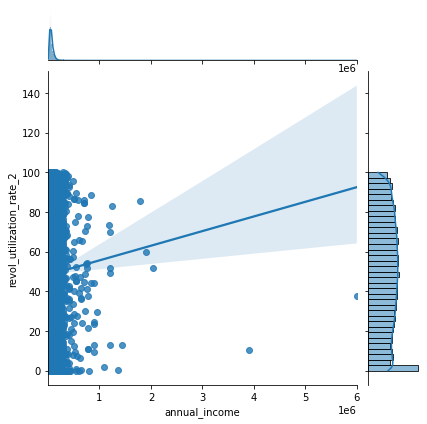

In [159]:
sns.jointplot("annual_income", "revol_utilization_rate_2", data=df1, kind="reg")

plt.show()

##### Insight : No change observed till a certain monthly income, and post that as the plot 
#### shows RUR increases with increase in income

<AxesSubplot:xlabel='annual_income', ylabel='dti'>

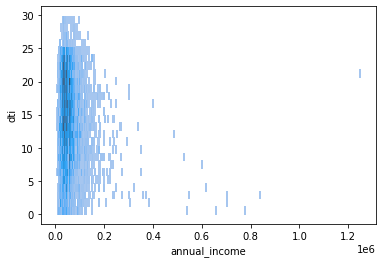

In [160]:
sns.histplot(x="annual_income",y= "dti", data= df1[df1.loan_status == "Charged Off"])

#### histplot shows with increase in monthly income dti is decreasing 

In [161]:
df_plot = df1.groupby(["home_ownership","loan_status"]).size().reset_index()
df_plot

,home_ownership,loan_status,0
0,MORTGAGE,Charged Off,2327
1,MORTGAGE,Fully Paid,14694
2,NONE,Fully Paid,3
3,OTHER,Charged Off,18
4,OTHER,Fully Paid,80
5,OWN,Charged Off,443
6,OWN,Fully Paid,2532
7,RENT,Charged Off,2839
8,RENT,Fully Paid,15641


In [162]:
df_plot.pivot(columns="home_ownership",index="loan_status",values=0)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,2327.0,NaN,18.0,443.0,2839.0
Fully Paid,14694.0,3.0,80.0,2532.0,15641.0


<AxesSubplot:xlabel='home_ownership'>

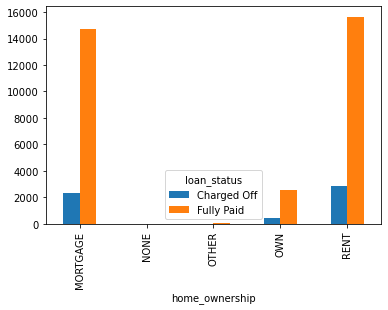

In [163]:
pd.crosstab(df1.home_ownership,df1.loan_status).plot.bar()

#### above two graph shows customer with mortgage and Rented property have high chances of defaulting

##### recommendation : provide loan only if all other criteria matches with positive response and if not then increase the interest rate.
#### on the other hand number of fully paid customers also more on Mortgage and Rent so denying also is a not good idea as more profit is given by these home ownership customers. Slight  increase in int rate can balance this situation 


Text(0.5, 1.0, 'Spread of employee duration on fully paid customers')

<Figure size 1152x720 with 0 Axes>

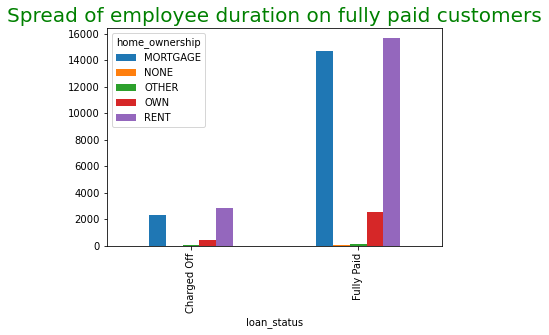

In [164]:
plt.figure(figsize=[16,10],)
df_plot.pivot(columns="home_ownership",index="loan_status",values=0).plot.bar()
plt.title("Spread of employee duration on fully paid customers",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

### Spread of term,verification status,grade,employee duration against fully paid and charged off customers

<Figure size 864x576 with 0 Axes>

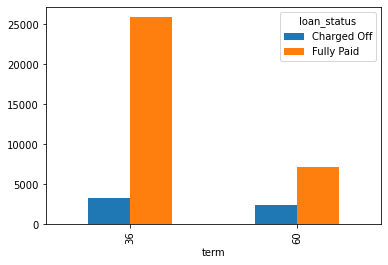

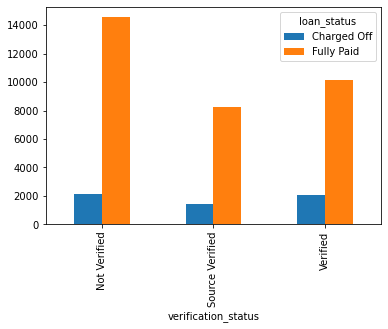

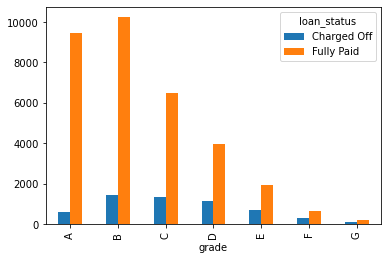

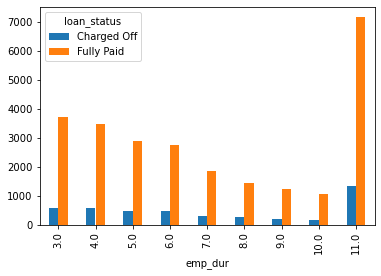

In [165]:
cat_vars = ["employment_duration","term","verification_status","grade","emp_dur","purpose","addr_state"]

plt.figure(figsize=(12,8))
for i in range(1,5):
    pd.crosstab(df1[cat_vars[i]],df1.loan_status).plot.bar()

plt.show()

## Insight:
##### Insight_1: Although with tenure of 36 months there is a slight increase in charged off customers, however
##### with 36 months tenure huge number of customers closing the loans successfully compared to 60 months tenure
##### Insight_2:Charged off customers are more for not verified customers. 
##### Insight_3:charged off customers are more on B,C,D Grades
####  Insight_4:employee duration 3 years to 4 years has a slight more chances of defaulting


In [166]:
# creating loan_status_Charged Off and loan_status_Fully Paid two columns with true value 1 and false value as 0 .

df1 = pd.get_dummies(df1, columns=['loan_status'])


### checking frequency of months, dti, revolve utilization  


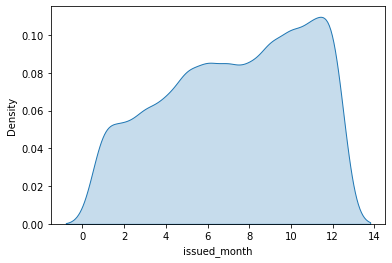

In [167]:
#dfc is the data frame subset with condition for only charged off customers
dfc = df1[df1["loan_status_Charged Off"] == 1]

# spread of issued month for charged off customers
sns.kdeplot(x = 'issued_month', data = dfc, shade = True)

plt.show()

##### insight : spread of customers getting the loan and defaulting in the month of Nov and dec is more

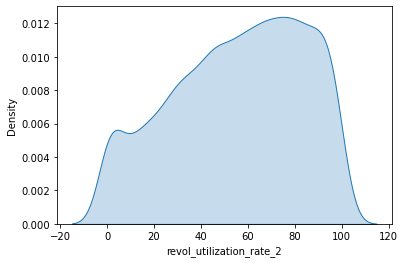

In [168]:
# spread of revol utilization rate for charged off customers 

sns.kdeplot(x = 'revol_utilization_rate_2', data = dfc, shade = True)

plt.show()

##### insight the density of  charged off customer's revolve utilization rate  is more around  60 to 80

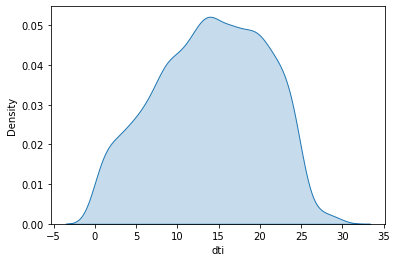

In [169]:
# spread of dti for charged off customers

sns.kdeplot(x = 'dti', data = dfc, shade = True)

plt.show()

##### insight: the density of  charged off customer's dti is more around 13 to 18


### Comparing funded amount investment bucket for charged off customer 

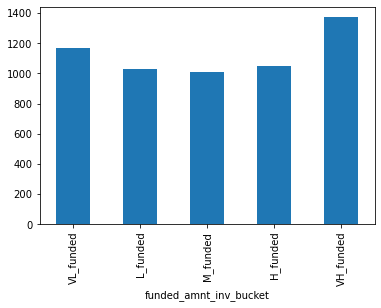

In [170]:
df1.groupby(["funded_amnt_inv_bucket"])["loan_status_Charged Off"].sum().plot.bar()
plt.show()

##### Insight : Very high funded customers are prone to charge off

### Comparing interest rate bucket for charged off customer 

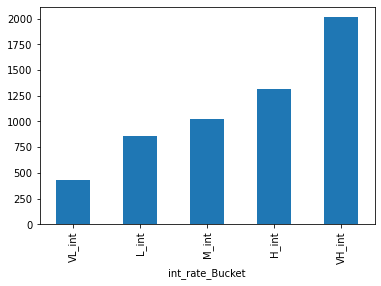

In [171]:
df1.groupby(["int_rate_Bucket"])["loan_status_Charged Off"].sum().plot.bar()
plt.show()

##### Insight : Very high and high interest customers are prone to charge off

##### also it is noticeable that increase in interest rate increase charge off customers  

### Comparing annual income bucket for charged off customer 

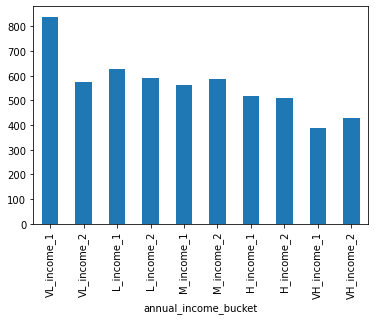

In [172]:
df1.groupby(["annual_income_bucket"])["loan_status_Charged Off"].sum().plot.bar()
plt.show()

#### Insight: Very low income category has (less than 10000) chances of defaulting 

### Comparing employment duration for charged off customer 

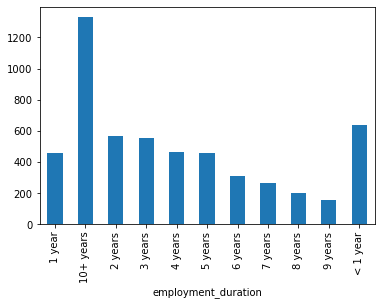

In [173]:
df1.groupby(["employment_duration"])["loan_status_Charged Off"].sum().plot.bar()
plt.show()

#### Insight : less than 1 year , and 2 and 3 years of employment has high risk of defaulting

### Comparing purpose for charged off customer 

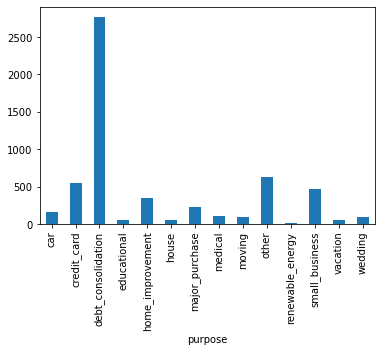

In [174]:
df1.groupby(["purpose"])["loan_status_Charged Off"].sum().plot.bar()
plt.show()

#### Insight : customers taken loan for debt consolidation has very high chances off defaulting 

### Comparing states for charged off customer 

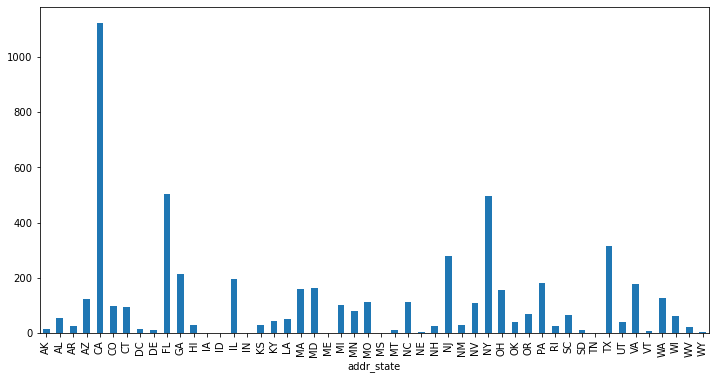

In [175]:
plt.figure(figsize=[12,6])

df1.groupby(["addr_state"])["loan_status_Charged Off"].sum().plot.bar()

plt.show()

#### Insight :Customers from addres State CA,FL,NY has high chances of defaulting. Specially customers from CA has very high chance 

### Comparing two categorical columns (home_ownership and verification_status) for bivariate analysis on charge off customers

In [176]:
pldf_4 = pd.pivot_table(data=df1,index="verification_status",columns="home_ownership",values="loan_status_Charged Off",
                       aggfunc=np.sum)
pldf_4 

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
verification_status,,,,,
Not Verified,836.0,0.0,10.0,187.0,1109.0
Source Verified,489.0,NaN,1.0,117.0,827.0
Verified,1002.0,NaN,7.0,139.0,903.0


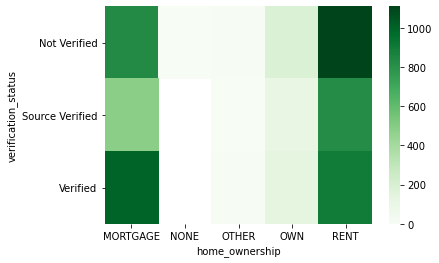

In [177]:
sns.heatmap(pldf_4,cmap = "Greens")
plt.show()

#### Insight: Verified Mortgage owners are defaulting on the loan more following not verified Mortgage owners. 
#### Not verified Rent owners are prone to default more.
#### Own house owners tends to default very less

### Comparing three categorical columns (int_rate_Bucket and annual_income_bucket) for  analysis on loan_status_Charged Off customers

In [178]:
pldf_2 = pd.pivot_table(data=df1,index="int_rate_Bucket",columns="annual_income_bucket",values="loan_status_Charged Off",aggfunc=np.sum)
pldf_2

annual_income_bucket,VL_income_1,VL_income_2,L_income_1,L_income_2,M_income_1,M_income_2,H_income_1,H_income_2,VH_income_1,VH_income_2
int_rate_Bucket,,,,,,,,,,
VL_int,78,63,59,50,49,35,32,29,16,18
L_int,155,92,106,87,86,77,72,66,63,51
M_int,181,115,123,103,99,107,80,94,56,62
H_int,219,150,144,149,120,129,116,108,94,82
VH_int,206,154,195,203,207,240,218,213,160,216


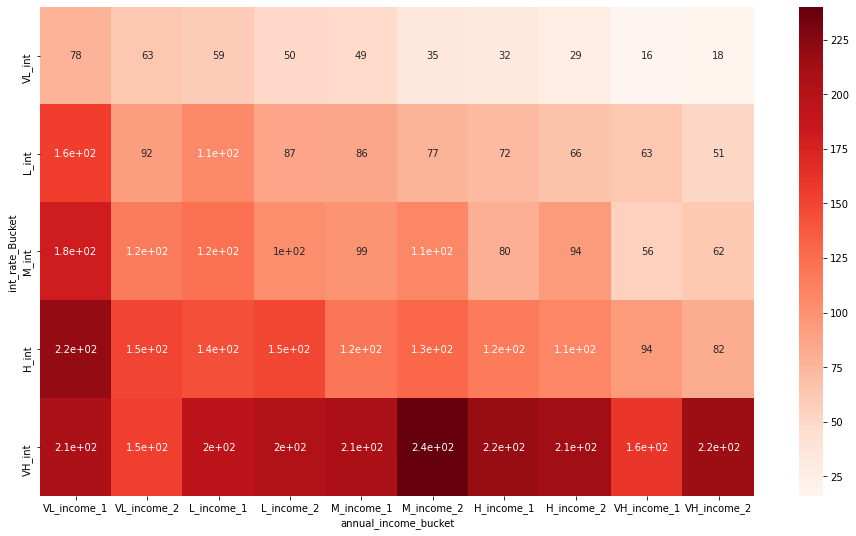

In [179]:
plt.figure(figsize=[16,9])

sns.heatmap(pldf_2,cmap = "Reds", annot=True)
plt.show()

#### Insight : with very high interest almost all category of income seems to be acting high for charge off customers.
#### with high and very high interest and with Very low  and low income range customers are failing to close loan successfully.
#### if income decreases and interset rate rises customers will default .  

### Comparing three categorical columns (int_rate_Bucket and term) for  analysis on loan_status_Charged Off customers

In [180]:
pldf_7 = pd.pivot_table(data=df1,index="term",columns="int_rate_Bucket",values="loan_status_Charged Off",aggfunc=np.sum)
pldf_7

int_rate_Bucket,VL_int,L_int,M_int,H_int,VH_int
term,,,,,
36,402.0,656.0,701.0,842.0,626.0
60,27.0,199.0,319.0,469.0,1386.0


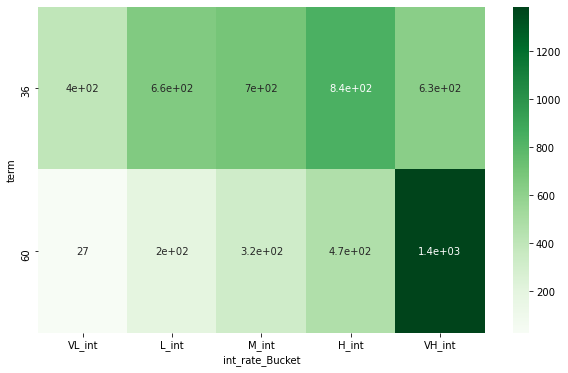

In [181]:
plt.figure(figsize=[10,6])

sns.heatmap(pldf_7,cmap = "Greens", annot=True)

plt.show()

##### Insight : This is noticeable Very high interest with 60 months tenure tends to make customers default more

## Recommendations: ##
##### Funding huge amount with high interest to applicants with low income (less than 10000) will not be a good idea.
##### Try to avoid customers who requires loan for debt consolidation purpose.
##### If providing loan to rented applicants need to complete the verifications as a must.
##### Applicants with low-income categories should not have huge interest rates if required need to reduce the funding amount.
##### Grades are good metric for detecting defaulters. Lending club should examine more information from borrowers before issuing loans to low grades (G to A).
##### Although with tenure of 36 months there is a slight increase in charged off customers, however with 36 months tenure huge number of customers closing the loans successfully compared to 60 months tenure. So we should be increasing the interest for 36 months tenure.
##### Try to avoid customers who are from state CA. if needed decrease funding amount or do an fix Deposit at the same time for being in safe side. 
##### We have noticed high income makes the DTI low so , focusing on good monthly income is always a good idea.
##### Providing loan to applicants whose employment is less than 2 years it’s a good idea to increase interest rate if not possible provide loan with lesser funding.
##### For less employment duration, lesser monthly income and low grades applicants it’s a good idea to get the principal amount in the initial instalments first so we can have less chances of loss. 


In [182]:
============================================================================================

SyntaxError: invalid syntax (<ipython-input-182-2ac58eb54261>, line 1)

### xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx=== END ===xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx